In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vk_id = 253802
kw_id = 277906
jr_id = 303669
ss_id = 267192

In [26]:
url = 'https://stats.espncricinfo.com/ci/engine/player/{}.html?class={};home_or_away=1;home_or_away=2;home_or_away=3;result=1;result=2;result=4;template=results;type=batting'

In [42]:
def get_player_info(id, formatt):
    player_url = url.format(id, formatt)
    data = pd.read_html(player_url)[3]
    data = data.drop(columns=['Unnamed: 15', 'Span'])
    data = data.dropna(0)
    data['HS'] = data['HS'].str.replace('*', '')
    data.iloc[:, 1:6] = data.iloc[:, 1:6].astype(float).astype(int)
    data['BF'] = data['BF'].astype(float).astype(int)
    data['Ave'] = data['Ave'].astype(float)
    data['SR'] = data['SR'].astype(float)
    data.iloc[:, 9:] = data.iloc[:, 9:].astype(float).astype(int)
    return data

In [47]:
vk_data = get_player_info(vk_id, 1)
kw_data = get_player_info(kw_id, 1)
jr_data = get_player_info(jr_id, 1)
ss_data = get_player_info(ss_id, 1)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [68]:
vk_demographic_data = vk_data.iloc[:23]
vk_year_wise_data = vk_data.iloc[23:35]
vk_szn_wise_data = vk_data.iloc[35:55]
vk_rest_data = vk_data.iloc[55:]

In [87]:
kw_demographic_data = kw_data.iloc[:27]
kw_year_wise_data = kw_data.iloc[27:39]
kw_szn_wise_data = kw_data.iloc[39:58]
kw_rest_data = kw_data.iloc[58:]

In [102]:
jr_demographic_data = jr_data.iloc[:26]
jr_year_wise_data = jr_data.iloc[26:37]
jr_szn_wise_data = jr_data.iloc[37:55]
jr_rest_data = jr_data.iloc[55:]

In [109]:
ss_demographic_data = ss_data.iloc[:25]
ss_year_wise_data = ss_data.iloc[25:37]
ss_szn_wise_data = ss_data.iloc[37:53]
ss_rest_data = ss_data.iloc[53:]

Text(0.5, 1.0, 'Runs Scored by the Fab 4 in tests over the years')

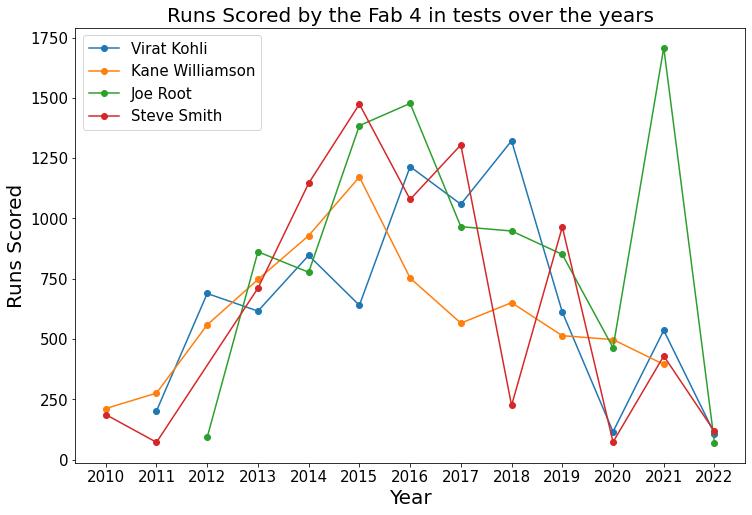

In [148]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data['Runs'], '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data['Runs'], '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data['Runs'], '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data['Runs'], '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs Scored', fontsize=20)
plt.xticks([i + 2010 for i in range(13)])
plt.title('Runs Scored by the Fab 4 in tests over the years', fontsize=20)

Text(0.5, 1.0, 'Cummulative Runs Scored by the Fab 4 in tests over the years')

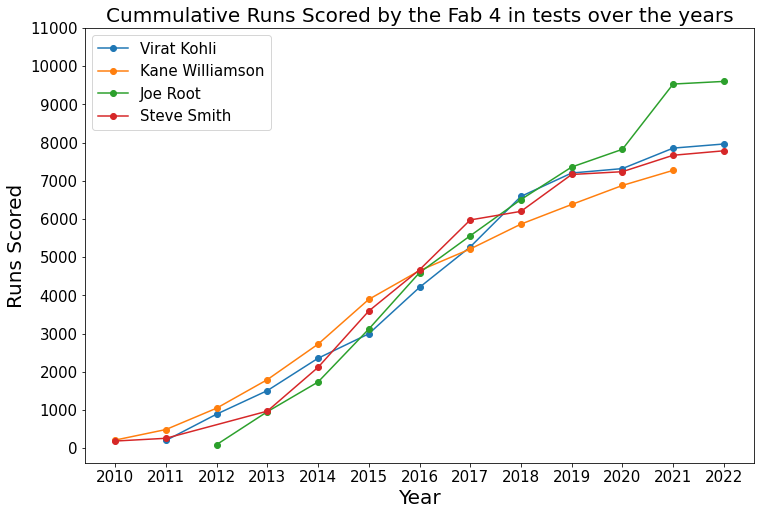

In [158]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data.Runs.cumsum(), '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data.Runs.cumsum(), '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data.Runs.cumsum(), '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data.Runs.cumsum(), '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs Scored', fontsize=20)
plt.xticks([i + 2010 for i in range(13)])
plt.yticks([i for i in range(0, 12000, 1000)])
plt.title('Cummulative Runs Scored by the Fab 4 in tests over the years', fontsize=20)

Text(0.5, 1.0, 'Average of the Fab 4 in tests over the years')

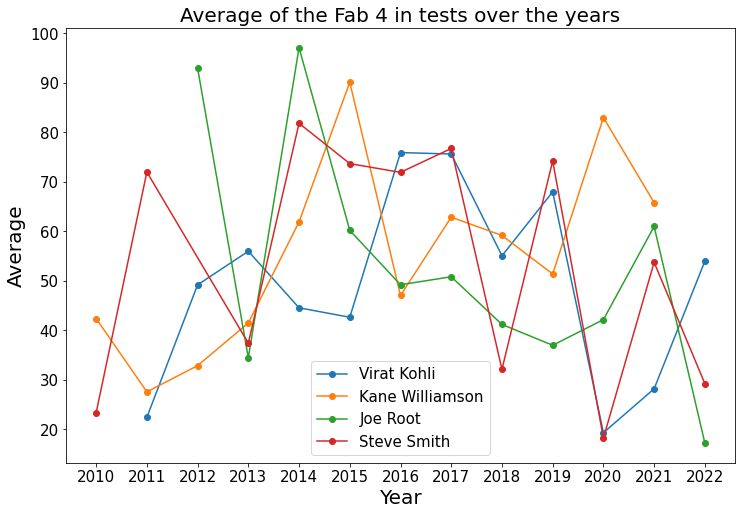

In [159]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(vk_year_wise_data['Grouping'].str.replace('year ', '').astype(int), vk_year_wise_data['Ave'], '-o')
plt.plot(kw_year_wise_data['Grouping'].str.replace('year ', '').astype(int), kw_year_wise_data['Ave'], '-o')
plt.plot(jr_year_wise_data['Grouping'].str.replace('year ', '').astype(int), jr_year_wise_data['Ave'], '-o')
plt.plot(ss_year_wise_data['Grouping'].str.replace('year ', '').astype(int), ss_year_wise_data['Ave'], '-o')
ax.tick_params(axis='both', labelsize=15)
plt.legend(['Virat Kohli', 'Kane Williamson', 'Joe Root', 'Steve Smith'], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average', fontsize=20)
plt.xticks([i + 2010 for i in range(13)])
plt.title('Average of the Fab 4 in tests over the years', fontsize=20)

Text(0.5, 1.0, 'Steve Smith')

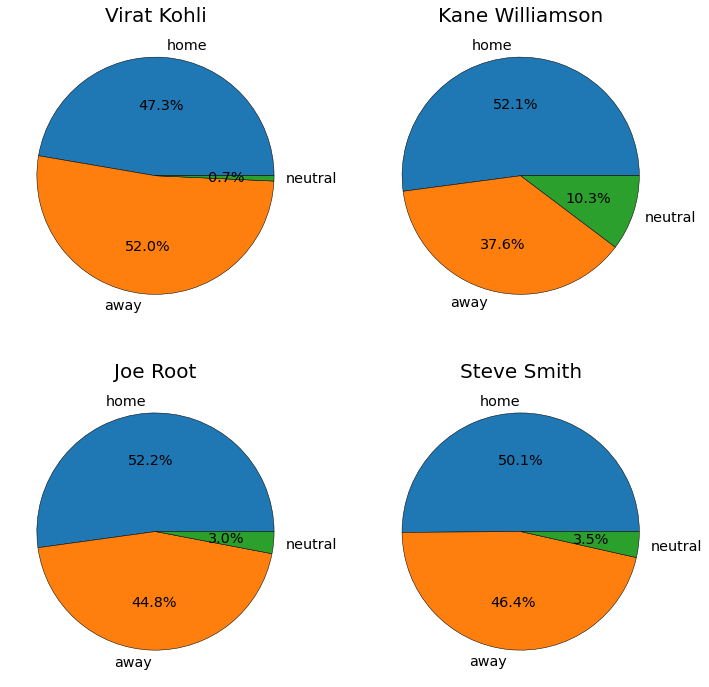

In [187]:
fig, ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor('white')
plt.subplot(2, 2, 1)
d = vk_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('Virat Kohli', fontsize=20)
plt.subplot(2, 2, 2)
d = kw_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('Kane Williamson', fontsize=20)
plt.subplot(2, 2, 3)
d = jr_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('Joe Root', fontsize=20)
plt.subplot(2, 2, 4)
d = ss_demographic_data.iloc[-3:, :]
plt.pie(d['Runs'], labels=d['Grouping'], autopct='%1.1f%%',
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'black'},
       textprops={'size': 'x-large'})
plt.title('Steve Smith', fontsize=20)